# Employee Performance Analysis

## Requirement

#### INX Future Inc, is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. In recent years, the employee performance indexes are not healthy and this has become a growing concern among the top management. The CEO Mr. Brain, decided to initiate a data science project, which analyzes the current employee data and find the core underlying causes of the performance issues. He also expects a clear indicators of non-performing employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals.

## Analysis

* The data is supervised and categorical. The predictor variables are ordinal and a few among them are nominal. The target variable 'Performance Rating' is ordinal.
* To analyze the data, various data processing techniques like Label Encoding is used. Correlation Coeffecient is used to interpret the relationship between variables. The Chi-Square Test is used for Feature Selection. The most important features selected are "EmpLastSalaryHikePercent","YearsSinceLastPromotion","ExperienceYearsAtThisCompany","EmpEnvironmentSatisfaction","YearsWithCurrManager","EmpDepartment","TotalWorkExperienceInYears","EmpJobRole".
* For training the data and predicting the target, algorithms used are Random Forest, XGBoost Classifier and also carried out Hyper parameter tuning for the improvemnet in accuracy.
* A separate analysis of Department wise Performance is carried out.

## Summary

#### The whole project is based on finding the features that affect the employee performance, then build the model which will predict the employee performance by giving the required feature. It also includes the analysis of data,finding Department wise performance and to provide recommendations to improve the performance and gain insights from the analysis.The following steps were carried out:

* Importing the data,finding the missing values etc..
* Analyzing the data through viusalization and analysing the department wise performance.
* Label encoding was carried out.
* Chi-Squared Test was used for feature selection,and for confirmation used correlation heat map.
* Train,test and split was done on data.
* Trained the model with Random forest classifier and XGB Classifier and also used hyper parameter tuning that is random searched CV for the improvement of model accuracy.



In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

# Data pre-processing and Data Analysis

In [4]:
#Checking if there are null values
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [5]:
#Checking how many rows and columns are there
df.shape

(1200, 28)

In [6]:
#checking if there are any duplicates
df.duplicated().sum()

0

In [7]:
#checking which columns are categoriacl and which columns are countinous
df.nunique()

EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition                          2
P

In [8]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sb

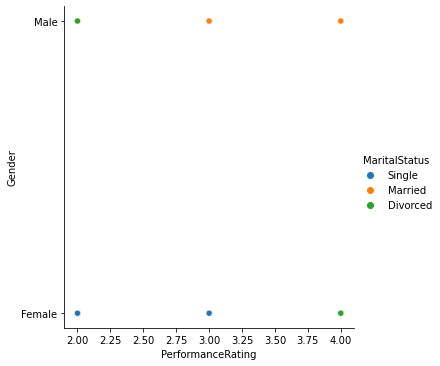

In [9]:
sb.relplot(x="PerformanceRating",y="Gender",hue="MaritalStatus" ,data=df)
# In the below insight we can see that in employess,most of males who have high rating are usually married,
# and most females are single,and astonishingly the high rating in women are females who are divorced.

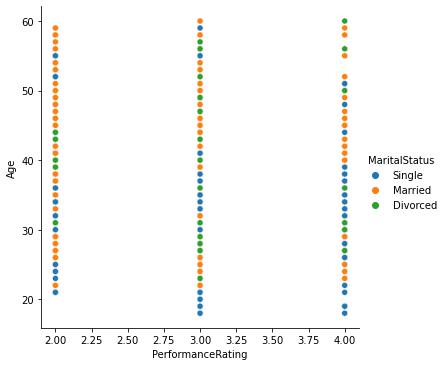

In [10]:
sb.relplot(x="PerformanceRating",y="Age",hue="MaritalStatus" ,data=df)
# most employees have rating 3

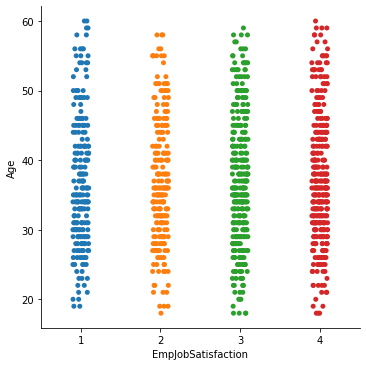

In [11]:
sb.catplot(x="EmpJobSatisfaction",y="Age",data=df)
# Now if you see the below plot you can see that even though more than half of employess are happy with the job,but unfortunately
# almost equal number of people are unstatisfied.

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EmpHourlyRate', ylabel='Density'>

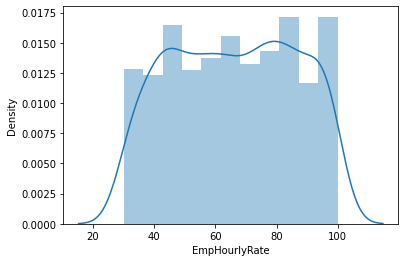

In [12]:
sb.distplot(df.EmpHourlyRate)
#As to counter the above problem ,now checking the hourly rate ,there is defenitly room for improvement,for employee satisfaction 
# we can try improve it.

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EmpLastSalaryHikePercent', ylabel='Density'>

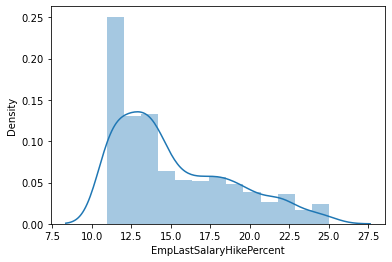

In [13]:
sb.distplot(df.EmpLastSalaryHikePercent)
# Suprisingly even though the hike percent is incresed its done very small amt of people
#we can try decrasing the hike percent and give it large number of employees ,Hence increasing their employee job satisfaction

# Department wise performance Analysis

In [14]:
dept = df.iloc[:,[5,27]]
dept

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3
...,...,...
1195,Sales,4
1196,Development,3
1197,Development,3
1198,Data Science,3


In [15]:
dept.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

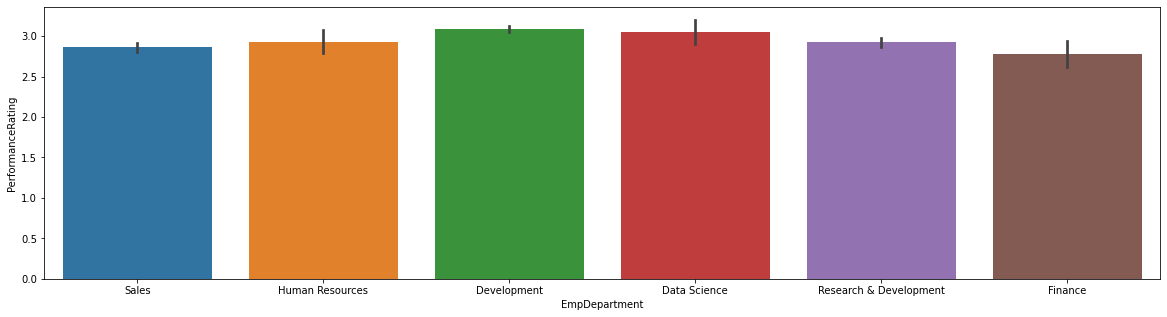

In [16]:
plt.figure(figsize=(20,5))
sb.barplot(dept.EmpDepartment, dept.PerformanceRating)

In [17]:
# Creating a new dataframe to analyze each department separately
dep = pd.get_dummies(dept['EmpDepartment'])
per = pd.DataFrame(dept['PerformanceRating'])
rating = pd.concat([dep,per],axis=1)
rating

,Data Science,Development,Finance,Human Resources,Research & Development,Sales,PerformanceRating
0,0,0,0,0,0,1,3
1,0,0,0,0,0,1,3
2,0,0,0,0,0,1,4
3,0,0,0,1,0,0,3
4,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...
1195,0,0,0,0,0,1,4
1196,0,1,0,0,0,0,3
1197,0,1,0,0,0,0,3
1198,1,0,0,0,0,0,3


C:\Users\Tejaswini C A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tejaswini C A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tejaswini C A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

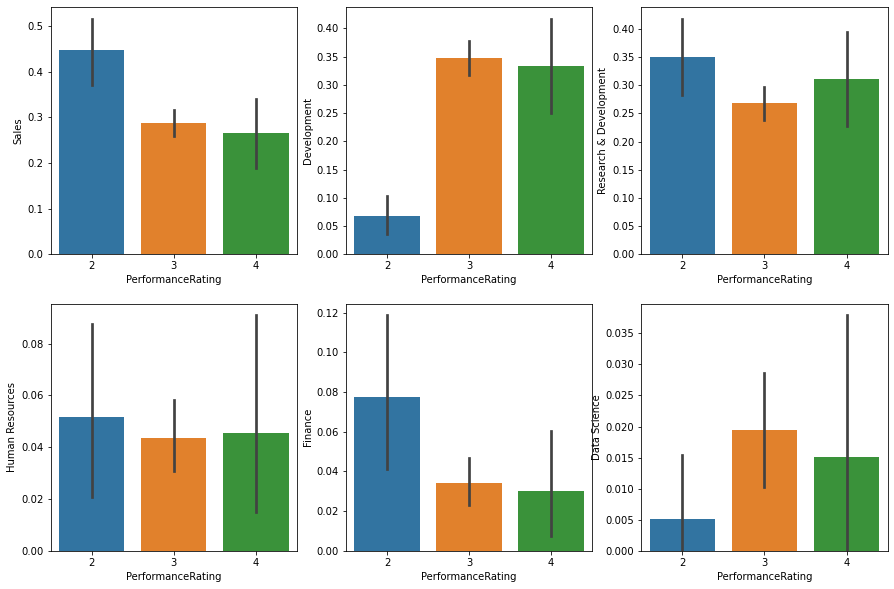

In [18]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sb.barplot(rating['PerformanceRating'],rating['Sales'])
plt.subplot(2,3,2)
sb.barplot(rating['PerformanceRating'],rating['Development'])
plt.subplot(2,3,3)
sb.barplot(rating['PerformanceRating'],rating['Research & Development'])
plt.subplot(2,3,4)
sb.barplot(rating['PerformanceRating'],rating['Human Resources'])
plt.subplot(2,3,5)
sb.barplot(rating['PerformanceRating'],rating['Finance'])
plt.subplot(2,3,6)
sb.barplot(rating['PerformanceRating'],rating['Data Science'])
plt.show()

# Label encoding

In [19]:
# Encoding all the ordinal columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in (1,2,3,4,5,6,7,16,26):
    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,14,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,29,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,22,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,23,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,42,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


# Feature selection

As we can see that there are a lot of Columns which are predictors ,hence to choose them there are many methods like finding the corelation value, a heatmap or Chi-Square Test, I am going with Chi-Square Test as i found it to be more usefull than the other methods.

### Chi-Square Test

In [20]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
#dividing the data to predictors and target
X = df.iloc[:,1:-1]
y=df.PerformanceRating

In [22]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,14,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,29,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,22,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0
3,23,1,0,0,3,8,2,10,4,2,...,15,2,23,2,2,21,6,12,6,0
4,42,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,0


In [23]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [24]:
# creating new columns with names of column and alongside with scores .
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [25]:
#adding the columns to the dataset
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [26]:
#dispalying the scores for each column 
featureScores

,Specs,Score
0,Age,10.089648
1,Gender,0.064501
2,EducationBackground,0.151941
3,MaritalStatus,1.232011
4,EmpDepartment,46.787010
5,EmpJobRole,35.896167
6,BusinessTravelFrequency,1.011364
7,DistanceFromHome,18.650010
8,EmpEducationLevel,0.314038
9,EmpEnvironmentSatisfaction,110.691319


In [27]:
# selected top 10 rows which impact on the target
print(featureScores.nlargest(10,'Score')) 

                           Specs       Score
16      EmpLastSalaryHikePercent  297.136917
23       YearsSinceLastPromotion  238.004284
21  ExperienceYearsAtThisCompany  133.602068
22  ExperienceYearsInCurrentRole  120.860036
9     EmpEnvironmentSatisfaction  110.691319
24          YearsWithCurrManager   87.483471
4                  EmpDepartment   46.787010
18    TotalWorkExperienceInYears   41.593037
5                     EmpJobRole   35.896167
7               DistanceFromHome   18.650010


### As we can see above top 10 rows in them the top three features which affect the performance are 
1.EmpLastSalaryHikePercent
2.YearsSinceLastPromotion
3.ExperienceYearsAtThisCompany
And further we can see that the score drastically decreases YearsWithCurrManager column hence i am going for top 9 rows and consider them as predictors 

# Corealtion Heatmap

In [28]:
df1=df.loc[:,["EmpLastSalaryHikePercent","YearsSinceLastPromotion","ExperienceYearsAtThisCompany","EmpEnvironmentSatisfaction","YearsWithCurrManager","EmpDepartment","TotalWorkExperienceInYears","EmpJobRole","PerformanceRating"]]
df1

,EmpLastSalaryHikePercent,YearsSinceLastPromotion,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction,YearsWithCurrManager,EmpDepartment,TotalWorkExperienceInYears,EmpJobRole,PerformanceRating
0,12,0,10,4,8,5,10,13,3
1,12,1,7,4,7,5,20,13,3
2,21,1,18,4,12,5,20,13,4
3,15,12,21,2,6,3,23,8,3
4,14,2,2,1,2,5,10,13,3
...,...,...,...,...,...,...,...,...,...
1195,20,0,6,4,4,5,6,13,4
1196,17,0,1,4,0,1,4,15,3
1197,11,3,20,4,8,1,20,15,3
1198,14,7,8,4,7,0,9,1,3


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpLastSalaryHikePercent      1200 non-null   int64
 1   YearsSinceLastPromotion       1200 non-null   int64
 2   ExperienceYearsAtThisCompany  1200 non-null   int64
 3   EmpEnvironmentSatisfaction    1200 non-null   int64
 4   YearsWithCurrManager          1200 non-null   int64
 5   EmpDepartment                 1200 non-null   int32
 6   TotalWorkExperienceInYears    1200 non-null   int64
 7   EmpJobRole                    1200 non-null   int32
 8   PerformanceRating             1200 non-null   int64
dtypes: int32(2), int64(7)
memory usage: 75.1 KB


In [30]:
df1.empty

False

In [31]:
df1.corr()

,EmpLastSalaryHikePercent,YearsSinceLastPromotion,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction,YearsWithCurrManager,EmpDepartment,TotalWorkExperienceInYears,EmpJobRole,PerformanceRating
EmpLastSalaryHikePercent,1.000000,-0.015911,-0.019830,-0.047271,-0.007666,-0.012661,-0.005933,0.005735,0.333722
YearsSinceLastPromotion,-0.015911,1.000000,0.620230,0.010732,0.491199,0.052315,0.412781,0.012190,-0.167629
ExperienceYearsAtThisCompany,-0.019830,0.620230,1.000000,-0.000561,0.759258,0.047677,0.633555,-0.009047,-0.111645
EmpEnvironmentSatisfaction,-0.047271,0.010732,-0.000561,1.000000,-0.011702,-0.019237,-0.012894,0.044612,0.395561
YearsWithCurrManager,-0.007666,0.491199,0.759258,-0.011702,1.000000,0.033850,0.460783,-0.004504,-0.122313
EmpDepartment,-0.012661,0.052315,0.047677,-0.019237,0.033850,1.000000,0.016065,0.568973,-0.162615
TotalWorkExperienceInYears,-0.005933,0.412781,0.633555,-0.012894,0.460783,0.016065,1.000000,-0.049529,-0.068141
EmpJobRole,0.005735,0.012190,-0.009047,0.044612,-0.004504,0.568973,-0.049529,1.000000,-0.096209
PerformanceRating,0.333722,-0.167629,-0.111645,0.395561,-0.122313,-0.162615,-0.068141,-0.096209,1.000000


<AxesSubplot:>

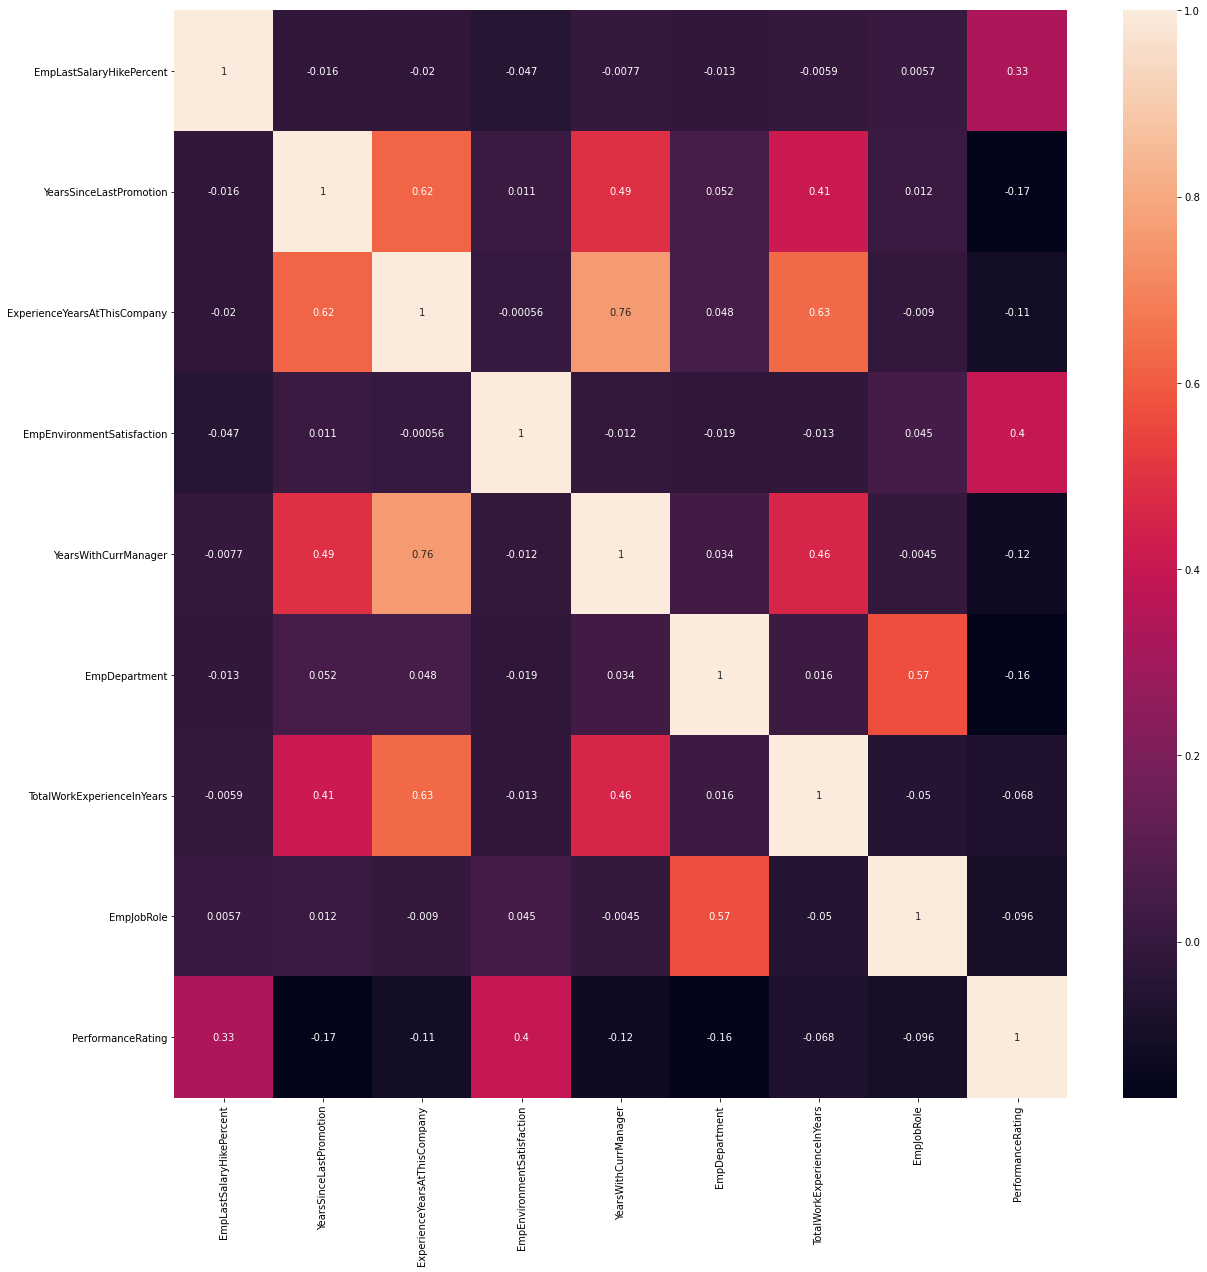

In [32]:
#plotting the heatmap
plt.figure(figsize=(20, 20))
sb.heatmap(df1.corr(), annot = True)

In [33]:
#Changing the Predictor columns
X1 = df.loc[:,["EmpLastSalaryHikePercent","YearsSinceLastPromotion","ExperienceYearsAtThisCompany","EmpEnvironmentSatisfaction","YearsWithCurrManager","EmpDepartment","TotalWorkExperienceInYears","EmpJobRole"]]
X1

,EmpLastSalaryHikePercent,YearsSinceLastPromotion,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction,YearsWithCurrManager,EmpDepartment,TotalWorkExperienceInYears,EmpJobRole
0,12,0,10,4,8,5,10,13
1,12,1,7,4,7,5,20,13
2,21,1,18,4,12,5,20,13
3,15,12,21,2,6,3,23,8
4,14,2,2,1,2,5,10,13
...,...,...,...,...,...,...,...,...
1195,20,0,6,4,4,5,6,13
1196,17,0,1,4,0,1,4,15
1197,11,3,20,4,8,1,20,15
1198,14,7,8,4,7,0,9,1


# train, test and split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.30,random_state=20)

# training the models

## 1.Random Forest CLassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
#Predicting on test value
y_predict=model.predict(X_test)

In [37]:
#Evaluation
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.925

### Randomforest accuracy : 0.9222222222222223

# 2. XGB Classifier

In [38]:
from xgboost import XGBClassifier

model1 = XGBClassifier(
    random_state=30,
    max_depth=10,
    n_estimators=15
)

model1.fit(X_train, y_train)

[16:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Tejaswini C A\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=30, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
#Predicting on test value
y_predict1=model1.predict(X_test)

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [40]:
#Evaluation
accuracy_score(y_predict1,y_test)

0.925

### XGB CLassifier accuracy : 0.925

# Hyperparameter Tuning

In [41]:
from sklearn.model_selection import RandomizedSearchCV

## Xgboost 

In [42]:
tuned_params = {
    'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [10, 15, 30, 50, 100], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]
}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

[16:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Tejaswini C A\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [43]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [44]:
print("Test Results for XGBoost Regressor Model:")

print("accuracy score: ", accuracy_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
accuracy score:  0.9388888888888889


### Test Results for XGBoost classifier Model:
### accuracy score:   0.9305555555555556

# Random forest Classifier

In [45]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [46]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [47]:
print("Test Results for Random Forest Regressor Model:")
print("accuracy score: ", accuracy_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
accuracy score:  0.9388888888888889


### Test Results for Random Forest classifier Model:
### accuracy score:   0.9388888888888889 



## Results

#### Random forest classifier model with random searched CV Gives highest percentage of 93.89 % , the features that are highly correlated with the model are EmpLastSalaryHikePercent , YearsSinceLastPromotion , ExperienceYearsAtThisCompany. The above features are the top 3 features with highest scores in chi-square test.

## Analysis and Insights

* It was observed that the maximum accuracy was obtained when we used Random Forest which was 93.89%. XGBoost Classifier also yielded an accuracy of 93.05%.
* After working on analysis of data ,I observed that the number of employees satisfied is almost equal to the number of employees who are not exactly satisfied,some of the reasons i found were employee hourly rate,and employee hike percentage.Hence  the company should increase the salary of the employee from time to time and help them maintain a worklife balance. On the other hand, shuffling the manager from time to time will also affect performance.

## Recomendation

##### From the results, we can conclude that the increase in salaray can defenitly improve the employee performance . Its a direct approach.